In [2]:
import os
import re
import pathlib
from google.colab import drive
# Get current workdir
current_dir = os.getcwd()

In [3]:
# Clone tensorflow models repository if it doesn't exist
if 'models' in pathlib.Path.cwd().parts:
  while 'models' in pathlib.Path.cwd().parts:
    od.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

# Install OD API
%cd $current_dir/models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!pip install .

/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.7 MB/s eta 0:00:00
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697356 sha256=a4486521bc9991460ab950c80cb5d7bc980c0574448f28d078cb2e977be82db4
  Stored in directory: /tmp/pip-ephem-wheel-cache-_h_pp1_7/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object-detection
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Succes

Here i hvae used tensorflow version 2.13.0 instead of 2.15.0 as it dosent had .contrib modules. I also skipped installing pycocotools seperately and used the one that were installed with tensorflow


In [4]:
!pip install tensorflow==2.13.0

  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.1
    Uninstalling tensorflow-2.15.1:
      Successfully uninstalled tensorflow-2.15.1
ER

In [5]:
# Import the necessary packages
import tensorflow as tf
print ('Root dir', current_dir)

Root dir /content


In [6]:
print('TensorFlow version', tf.__version__) #<- must be 2.13.0
print('The current directory is', current_dir)

TensorFlow version 2.13.0
The current directory is /content


In [7]:
!nvidia-smi

Sun Mar 10 11:48:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
# Define some constants
RANDOM_SEED = 99
BATCH_SIZE = 1
NUM_STEPS = 25000
NUM_EVAL_STEPS = 1000
NUM_CLASSES = 3

In [9]:
# Download FASTER RCNN ResNet101 if it doesn't exist locally
if not os.path.isdir('faster_rcnn_resnet101_v1-640x640_coco17_tpu-8'):
  !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
  # Unzip the compressed file
  !tar -xf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
  # Cleanup
  !rm faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

--2024-03-10 11:48:23--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.117.207, 74.125.20.207, 74.125.197.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.117.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353643040 (337M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet1 100%[===================>] 337.26M   228MB/s    in 1.5s    

2024-03-10 11:48:24 (228 MB/s) - ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’ saved [353643040/353643040]



In [10]:
labels = [
    'piscina',
    'rotonda',
    'parking',
]

with open('label_map.pbtxt', 'w') as f:
    for i, label in enumerate(labels, 1):
        name = label.lower().replace(' ', '_')
        f.write('item {\n')
        f.write(f'\tname: "{name}"\n')
        f.write(f'\tid: {i}\n')
        f.write(f'\tdisplay_name: "{label}"\n')
        f.write('}\n')

In [11]:
# Show label_map.txt
%cat 'label_map.pbtxt'


item {
	name: "piscina"
	id: 1
	display_name: "piscina"
}
item {
	name: "rotonda"
	id: 2
	display_name: "rotonda"
}
item {
	name: "parking"
	id: 3
	display_name: "parking"
}


In [12]:
current_dir

'/content'

In [13]:
# Train, Test TFRecords
train_record_path =f"/content/data/train.record"
valid_record_path =f"/content/data/val.record"

# Labelmap
labelmap_path = 'label_map.pbtxt'

In [14]:
# Load the last checkpoint if it exists
fine_tune_checkpoint_fasterrcnn = 'faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0'

print('Checkpoint Dir for Faster RCNN:', fine_tune_checkpoint_fasterrcnn)

Checkpoint Dir for Faster RCNN: faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0


In [15]:
# Hyperparameters
if os.path.isfile('pipleline.config'):
  !rm 'pipeline.config'

# Download the pipline's config file
!wget https://raw.githubusercontent.com/ayoubbensakhria/ObjectDetectionFRCNN/master/faster_rcnn_resnet101/pipeline.config

# set config file variable
base_config_path_fasterrcnn = 'pipeline.config'

--2024-03-10 11:48:30--  https://raw.githubusercontent.com/ayoubbensakhria/ObjectDetectionFRCNN/master/faster_rcnn_resnet101/pipeline.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3834 (3.7K) [text/plain]
Saving to: ‘pipeline.config.1’

pipeline.config.1   100%[===================>]   3.74K  --.-KB/s    in 0s      

2024-03-10 11:48:30 (48.5 MB/s) - ‘pipeline.config.1’ saved [3834/3834]



Here instead of doing the config file changes manually i used a function. In the config file i have done an extra update that is setting fine-tuning checkpoint to detection from classification this was not mentioned in the instructions.


In [16]:
# Edit the model's config pipeline and set different hyperparameters
def edit_config(model_name, base_config_path, fine_tune_checkpoint):
  with open(base_config_path) as f:
    config = f.read()

  with open('{model}_config.config'.format(model=model_name), 'w') as f:

    # Set labelmap path
    config = re.sub('label_map_path: ".*?"',
              'label_map_path: "{}"'.format(labelmap_path), config)

    # Set fine_tune_checkpoint path
    config = re.sub('fine_tune_checkpoint: ".*?"',
                    'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)

    # Set train tf-record file path
    config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")',
                    'input_path: "{}"'.format(train_record_path), config)

    # Set test tf-record file path
    config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")',
                    'input_path: "{}"'.format(valid_record_path), config)

    # Set number of classes.
    config = re.sub('num_classes: [0-9]+',
                    'num_classes: {}'.format(NUM_CLASSES), config)

    # Set batch size
    config = re.sub('batch_size: [0-9]+',
                    'batch_size: {}'.format(BATCH_SIZE), config)

    # Set training steps
    config = re.sub('num_steps: [0-9]+',
                    'num_steps: {}'.format(NUM_STEPS), config)

    # Set fine-tune checkpoint type to detection
    config = re.sub('fine_tune_checkpoint_type: "classification"',
              'fine_tune_checkpoint_type: "{}"'.format('detection'), config)

    f.write(config)

In [17]:
# Edit config file of Faster RCNN using the function defined above
edit_config('fasterrcnn', base_config_path_fasterrcnn, fine_tune_checkpoint_fasterrcnn)

# Clean up
!rm 'pipeline.config'

# Print config pipeline
%cat 'fasterrcnn_config.config'

# Faster R-CNN with Resnet-101 (v1)
# Trained on COCO, initialized from Imagenet classification checkpoint

# This config is TPU compatible.

model {
  faster_rcnn {
    num_classes: 3
    image_resizer {
      fixed_shape_resizer {
        width: 640
        height: 640
      }
    }
    feature_extractor {
      type: 'faster_rcnn_resnet101_keras'
      batch_norm_trainable: true
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncated_normal_initializer {
          stddev: 0.01
        }
      }
    }
    first_stage_nms_score_threshold: 0.0
    first_stage_nms_iou_threshold: 0.7
    first_stage_max_proposals: 300
    first_stage_localization_los

In [18]:
# Faster RCNN model training directory and config pipeline
model_dir = os.path.join(current_dir, 'training')
pipeline_config_path = 'fasterrcnn_config.config'

# Test training params
print (pipeline_config_path, model_dir, NUM_STEPS)


fasterrcnn_config.config /content/training 25000


In [21]:

# Execute Training
!python $current_dir/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path=$pipeline_config_path \
    --model_dir=$model_dir \
    --alsologtostderr \
    --num_train_steps=$NUM_STEPS

2024-03-10 12:03:25.793095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-10 12:03:28.525874: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0310 12:03:28.527404 135116922630144 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 25000
I0310 12:03:28.550170 135116922630144 config_util.py:552] Maybe overwriting train_steps: 25000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0310 12:03:28.550339 135116

In [22]:
output_directory=f'/content/ouput'

!python $current_dir//models/research/object_detection/exporter_main_v2.py --trained_checkpoint_dir $model_dir --output_directory $output_directory --pipeline_config_path $pipeline_config_path

2024-03-10 13:44:02.859102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-10 13:44:05.837488: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0310 13:44:06.321897 138828870418432 deprecation.py:641] From /usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will 

In [23]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pathlib

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [24]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [25]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [26]:
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name,
    origin=base_url + model_file,
    untar=True)

  model_dir = pathlib.Path(model_dir)/"saved_model"

  model = tf.saved_model.load(str(model_dir))

  return model

In [27]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = f'/content/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [28]:
categories= []
for key in category_index:
    categories.append(category_index[key])

In [29]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/test/images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('/content/test/images/alcorcon_sur_40.3311946_-3.8314931.jpg')]

In [30]:
PATH_TO_TEST_LABELS_DIR = pathlib.Path('/content/test/labels')
TEST_LABEL_PATHS = sorted(list(PATH_TO_TEST_LABELS_DIR.glob("*.xml")))
TEST_LABEL_PATHS

[PosixPath('/content/test/labels/alcorcon_sur_40.3311946_-3.8314931.xml')]

In [32]:
detection_model = tf.saved_model.load('/content/ouput/saved_model')

In [33]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=resource>, <tf.Tenso

In [34]:
detection_model.signatures['serving_default'].output_dtypes

{'detection_multiclass_scores': tf.float32,
 'detection_anchor_indices': tf.float32,
 'detection_boxes': tf.float32,
 'raw_detection_boxes': tf.float32,
 'raw_detection_scores': tf.float32,
 'detection_classes': tf.float32,
 'num_detections': tf.float32,
 'detection_scores': tf.float32}

In [35]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  print(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

In [36]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  print(output_dict)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

[[[ 95  92  75]
  [ 82  79  62]
  [ 65  62  45]
  ...
  [137 133 122]
  [152 148 136]
  [115 111  99]]

 [[108 105  88]
  [ 95  92  75]
  [ 73  70  53]
  ...
  [133 129 118]
  [126 122 110]
  [132 128 116]]

 [[117 114  97]
  [106 103  86]
  [ 73  70  53]
  ...
  [152 148 137]
  [118 114 102]
  [135 131 119]]

 ...

 [[ 79  78  60]
  [ 87  86  68]
  [ 90  88  73]
  ...
  [ 34  33  31]
  [ 24  23  21]
  [ 26  25  23]]

 [[ 84  81  64]
  [ 91  88  71]
  [ 92  89  72]
  ...
  [ 14  13  11]
  [ 26  25  23]
  [ 25  24  22]]

 [[ 94  91  74]
  [ 99  96  79]
  [ 98  95  78]
  ...
  [ 21  20  18]
  [ 18  17  15]
  [ 23  22  20]]]
{'detection_multiclass_scores': array([[0.08358277, 0.73645407, 0.14214398, 0.03781918],
       [0.0853631 , 0.68147904, 0.1747566 , 0.05840122],
       [0.0562741 , 0.63707423, 0.24718219, 0.05946949],
       ...,
       [0.18581858, 0.32961842, 0.24259195, 0.24197105],
       [0.16124201, 0.4862947 , 0.2419824 , 0.11048097],
       [0.14839634, 0.43772194, 0.2414253

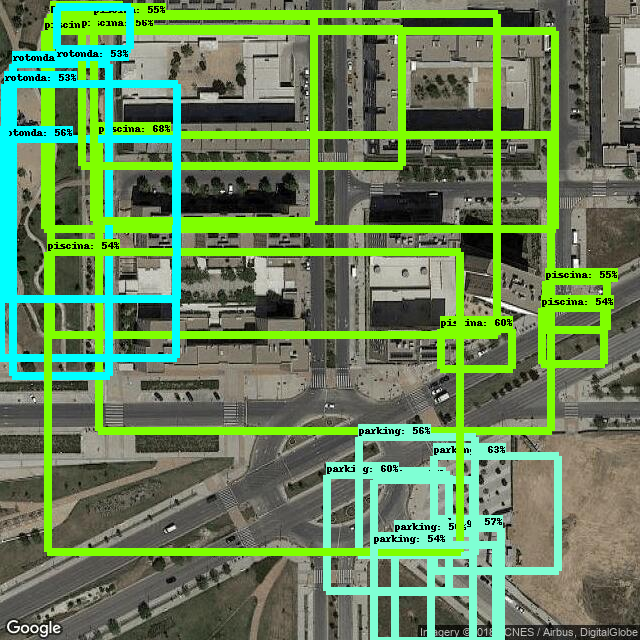

In [37]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)

In [40]:
# prompt: copy folders (data,models,output,test,training) to drive

#!cp -r /content/data /content/drive/My\ Drive/
#!cp -r /content/models /content/drive/My\ Drive/
!cp -r /content/ouput /content/drive/My\ Drive/
#!cp -r /content/test /content/drive/My\ Drive/
#!cp -r /content/training /content/drive/My\ Drive/


In [39]:
!cp -r /content/label_map.pbtxt /content/drive/My\ Drive/
